In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
folder_path = "/content/drive/My Drive/LLM Upwork Data and collab/All Results A"

In [15]:
import os
import re
import pandas as pd

In [16]:
# Group A GitHub
# Initialize a list for results
results = []

# Loop through all .txt files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".txt"):
        file_path = os.path.join(folder_path, filename)

        # Read file
        with open(file_path, "r", encoding="utf-8") as f:
            text = f.read()

        # Extract only USER text (multiline-safe)
        user_segments = re.findall(r"USER:(.*?)(?=AGENT:|$)", text, flags=re.S)
        user_text = " ".join(segment.strip() for segment in user_segments)

        # Count
        char_count = len(user_text)
        word_count = len(user_text.split())

        # Store results
        results.append({
            "filename": filename,
            "user_characters": char_count,
            "user_words": word_count
        })

# Convert to DataFrame and save ---
df = pd.DataFrame(results)
# output_path = os.path.join(folder_path, "user_character_counts.csv")
# df.to_csv(output_path, index=False)

# print(f"Done! Results saved to:\n{output_path}")
df.head()

,filename,user_characters,user_words
0,R_12sQIBwFdNrMs5w_4.txt,491,75
1,R_12sQIBwFdNrMs5w_10.txt,489,73
2,R_12sQIBwFdNrMs5w_8.txt,423,64
3,R_12sQIBwFdNrMs5w_13.txt,518,86
4,R_12sQIBwFdNrMs5w_14.txt,576,88


In [17]:
# Group C
folder_path1 = "/content/drive/My Drive/LLM Upwork Data and collab/All Results C"
# Initialize a list for results
results = []

# Loop through all .txt files in the folder
for filename in os.listdir(folder_path1):
    if filename.endswith(".txt"):
        file_path = os.path.join(folder_path1, filename)

        # Read file
        with open(file_path, "r", encoding="utf-8") as f:
            text = f.read()

        # Extract only USER text (multiline-safe)
        user_segments = re.findall(r"USER\s*\d*:(.*?)(?=AGENT\s*\d*:|$)", text, flags=re.S)
        user_text = " ".join(segment.strip() for segment in user_segments)

        # Count
        char_count = len(user_text)
        word_count = len(user_text.split())

        # Store results
        results.append({
            "filename": filename,
            "user_characters": char_count,
            "user_words": word_count
        })

# Convert to DataFrame and save ---
df = pd.DataFrame(results)
# output_path = os.path.join(folder_path, "user_character_counts_c.csv")
# df.to_csv(output_path, index=False)

# print(f"Done! Results saved to:\n{output_path}")
df.head()

,filename,user_characters,user_words
0,R_4oyRQwpjG1rhsxc-GitHub-10.txt,416,64
1,R_4oyRQwpjG1rhsxc-GitHub-7.txt,570,88
2,R_4oyRQwpjG1rhsxc-GitHub-6.txt,561,81
3,R_4oyRQwpjG1rhsxc-GitHub-5.txt,418,68
4,R_4oyRQwpjG1rhsxc-GitHub-4.txt,446,71


In [18]:
cd "/content/drive/My Drive/LLM Upwork Data and collab/cleaned data"

/content/drive/My Drive/LLM Upwork Data and collab/cleaned data


In [19]:
#correlation between user words and agreement rate- GitHub scenario
GitHub = pd.read_excel("GitHub prompting.xlsx")
k8 = pd.read_excel("K8 prompting.xlsx")
# print(GitHub.head())
print(k8.head())

  Group         Participant ID Threat ID Threat Group  prompts  \
0     A  R\_1hGOqpRX70zbmnt_11  Threat 1          1-5        1   
1     A  R\_1hGOqpRX70zbmnt_12  Threat 2          1-5        1   
2     A  R\_1hGOqpRX70zbmnt_13  Threat 3          1-5        1   
3     A  R\_1hGOqpRX70zbmnt_14  Threat 4          1-5        1   
4     A  R\_1hGOqpRX70zbmnt_15  Threat 5          1-5        1   

   LLM suggestion  participant assessment  agreement/disagreement  user_words  
0               1                       1                       1          94  
1               1                       1                       1          88  
2               1                      -1                       0          96  
3               1                       1                       1          96  
4               1                       1                       1          80  


In [20]:
# Aggregate by Group (A/C) and Threat Group  (1-5, 6-10)- GitHub scenario
agg = GitHub.groupby(["Group","Threat Group"]).agg(
    agreement_rate=("agreement/disagreement", "mean"),  # average agreement
    avg_user_words=("user_words", "mean")               # average user words
).reset_index()

print(agg)

# Compute correlation
correlation = agg["avg_user_words"].corr(agg["agreement_rate"])
print("Correlation between average user_words and agreement_rate:", correlation)
# corr_by_group = agg.groupby("Group").apply(
#     lambda g: g["avg_user_words"].corr(g["agreement_rate"])
# ).reset_index(name="correlation")

# print(corr_by_group)


# Statistical test
from scipy.stats import pearsonr
r, p = pearsonr(agg["avg_user_words"], agg["agreement_rate"])
print(f"Correlation (r): {r:.3f}")
print(f"P-value: {p:.4f}")

  Group Threat Group  agreement_rate  avg_user_words
0     A          1-5        0.723077       79.692308
1     A         6-10        0.596774       84.290323
2     C          1-5        0.402597       72.831169
3     C         6-10        0.375000       75.600000
Correlation between average user_words and agreement_rate: 0.7188427759109657
Correlation (r): 0.719
P-value: 0.2812


In [21]:
# Aggregate by Group (A/C) and Threat Group  (1-5, 6-10) - K8 scenario
agg = k8.groupby(["Group","Threat Group"]).agg(
    agreement_rate=("agreement/disagreement", "mean"),  # average agreement
    avg_user_words=("user_words", "mean")               # average user words
).reset_index()

print(agg)

# Compute correlation
correlation = agg["avg_user_words"].corr(agg["agreement_rate"])
print("Correlation between average user_words and agreement_rate:", correlation)
# corr_by_group = agg.groupby("Group").apply(
#     lambda g: g["avg_user_words"].corr(g["agreement_rate"])
# ).reset_index(name="correlation")

# print(corr_by_group)


# Statistical test
from scipy.stats import pearsonr
r, p = pearsonr(agg["avg_user_words"], agg["agreement_rate"])
print(f"Correlation (r): {r:.3f}")
print(f"P-value: {p:.4f}")

  Group Threat Group  agreement_rate  avg_user_words
0     A          1-5        0.765625       92.656250
1     A         6-10        0.476190       90.507937
2     C          1-5        0.450000       95.375000
3     C         6-10        0.325000       93.100000
Correlation between average user_words and agreement_rate: -0.14943193113933767
Correlation (r): -0.149
P-value: 0.8506


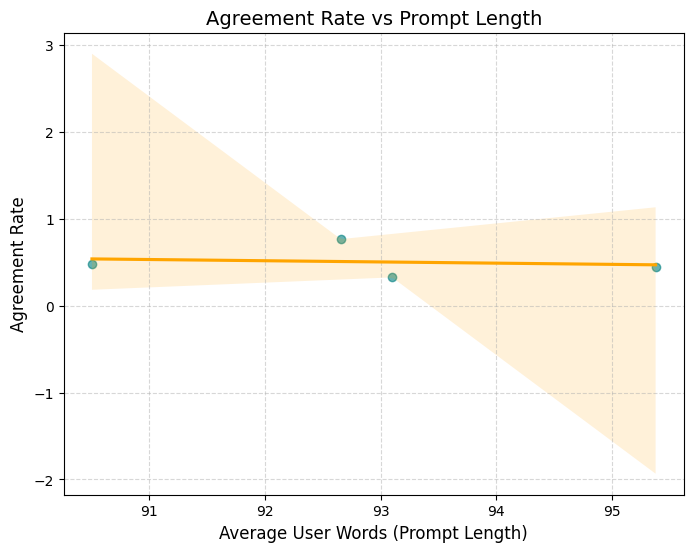

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.regplot(
    data=agg,
    x="avg_user_words",
    y="agreement_rate",
    scatter_kws={"alpha": 0.6, "color": "teal"},
    line_kws={"color": "orange"}
)

plt.title("Agreement Rate vs Prompt Length", fontsize=14)
plt.xlabel("Average User Words (Prompt Length)", fontsize=12)
plt.ylabel("Agreement Rate", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

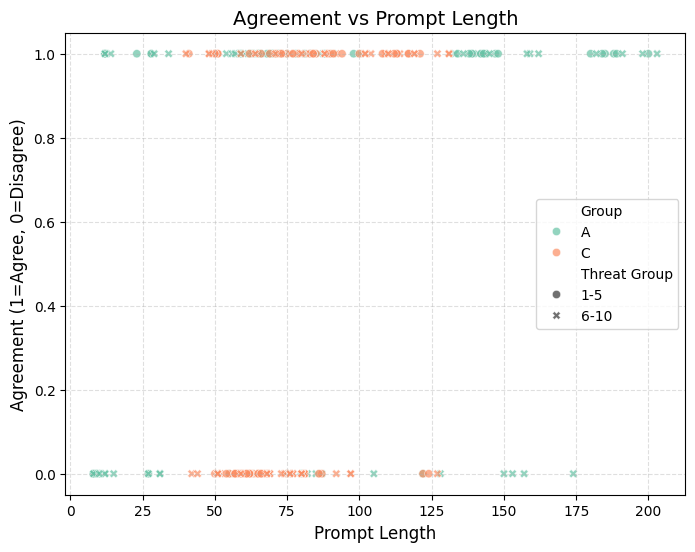

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=GitHub,
    x="user_words",
    y="agreement/disagreement",
    hue="Group",            # color by Group (A/C)
    style="Threat Group",   # different markers for threat groups
    palette="Set2",
    alpha=0.7
)

plt.title("Agreement vs Prompt Length", fontsize=14)
plt.xlabel("Prompt Length", fontsize=12)
plt.ylabel("Agreement (1=Agree, 0=Disagree)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.4)
plt.show()

In [27]:
#calculate percentage of inclonclusive llm suggestions

percentageGH= GitHub["LLM suggestion"].value_counts(normalize=True) * 100
percentagek8 = k8["LLM suggestion"].value_counts(normalize=True) * 100
print(percentageGH)
print(percentagek8)

LLM suggestion
 1    48.239437
 0    40.140845
-1    11.619718
Name: proportion, dtype: float64
LLM suggestion
 1    54.703833
 0    42.508711
-1     2.787456
Name: proportion, dtype: float64
